# Équations du système

## 1. **Couche 1 :**
   $
   \begin{pmatrix}
   z_1^{[1]} \\
   z_2^{[1]}
   \end{pmatrix} = W^{[1]} \begin{pmatrix}
   x_1 \\
   x_2
   \end{pmatrix} + \begin{pmatrix}
   b_1^{[1]} \\
   b_2^{[1]}
   \end{pmatrix}
   $
   
   $
   W^{[1]} = \begin{pmatrix}
   w_{11}^{[1]} & w_{12}^{[1]} \\
   w_{21}^{[1]} & w_{22}^{[1]}
   \end{pmatrix}
   $
   
  $
   z_1^{[1]} = w_{11}^{[1]} x_1 + w_{12}^{[1]} x_2 - b_1^{[1]}
   $
   
  $
   z_2^{[1]} = w_{21}^{[1]} x_1 + w_{22}^{[1]} x_2 - b_2^{[1]}
   $

## 2. **Fonction d'activation ReLU :**
   $
   ReLU(x) = \max(0, x)
   $

## 3. **Couche 2 :**
  $
   z_1^{[2]} = W^{[2]} \begin{pmatrix}
   a_1^{[1]} \\
   a_2^{[1]}
   \end{pmatrix} + b_1^{[2]}
   $
   
   $
   W^{[2]} = \begin{pmatrix}
   w_{11}^{[2]} & w_{12}^{[2]} 
   \end{pmatrix}
   $
   
   $
   z_1^{[2]} = w_{11}^{[2]} a_1^{[1]} + w_{12}^{[2]} a_2^{[1]} - b_1^{[2]}
   $

## 4. **Fonction d'activation sigmoïde :**
   $
   \sigma(x) = \frac{1}{1 + e^{-x}}
  $

## 5 **Fonction de perte d'entropie croisée**
La fonction de perte d'entropie croisée pour un problème de classification binaire est donnée par :

$
L = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$

où :
- $ y $ est la vraie étiquette (0 ou 1),
- $ \hat{y} $ est la prédiction du modèle (sortie de la couche finale après application de la sigmoïde).

---

## **Calcul de $\frac{\partial L}{\partial \hat{y}}$**
La dérivée de la perte $ L $ par rapport à la prédiction $ \hat{y} $ est :

$
\frac{\partial L}{\partial \hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)
$

---

## **Calcul de $\frac{\partial L}{\partial z^{[2]}}$**
La prédiction $ \hat{y} $ est obtenue en appliquant la fonction sigmoïde à $ z^{[2]} $ :

$
\hat{y} = \sigma(z^{[2]}) = \frac{1}{1 + e^{-z^{[2]}}}
$

La dérivée de la sigmoïde est :

$
\frac{\partial \hat{y}}{\partial z^{[2]}} = \hat{y} (1 - \hat{y})
$

Ainsi, la dérivée de \( L \) par rapport à \( z^{[2]} \) est :

$
\frac{\partial L}{\partial z^{[2]}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z^{[2]}} = \left( -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y} (1 - \hat{y}) = \hat{y} - y
$

Pour calculer les gradients de la fonction de perte $ L $ de type **entropie croisée** par rapport aux poids $ w_i $ et aux biais $ b_i $, on utilise la **rétropropagation** (backpropagation). Voici les étapes détaillées pour calculer $\frac{\partial L}{\partial w_i}$ et $\frac{\partial L}{\partial b_i}$ :

---

### 1. Fonction de perte d'entropie croisée
La fonction de perte d'entropie croisée pour un problème de classification binaire est donnée par :

$
L = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$

où :
- $ y $ est la vraie étiquette (0 ou 1),
- $ \hat{y} $ est la prédiction du modèle (sortie de la couche finale après application de la sigmoïde).

---

### 2. Calcul de $\frac{\partial L}{\partial \hat{y}}$
La dérivée de la perte $ L $ par rapport à la prédiction $ \hat{y} $ est :

$
\frac{\partial L}{\partial \hat{y}} = -\left( \frac{y}{\hat{y}} - \frac{1 - y}{1 - \hat{y}} \right)
$

---

### 3. Calcul de $\frac{\partial L}{\partial z^{[2]}}$
La prédiction $ \hat{y} $ est obtenue en appliquant la fonction sigmoïde à $ z^{[2]} $ :

$
\hat{y} = \sigma(z^{[2]}) = \frac{1}{1 + e^{-z^{[2]}}}
$

La dérivée de la sigmoïde est :

$
\frac{\partial \hat{y}}{\partial z^{[2]}} = \hat{y} (1 - \hat{y})
$

Ainsi, la dérivée de $ L $ par rapport à $ z^{[2]} $ est :

$
\frac{\partial L}{\partial z^{[2]}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z^{[2]}} = \left( -\frac{y}{\hat{y}} + \frac{1 - y}{1 - \hat{y}} \right) \cdot \hat{y} (1 - \hat{y}) = \hat{y} - y
$

---

### 4. Calcul de $\frac{\partial L}{\partial w^{[2]}}$ et $\frac{\partial L}{\partial b^{[2]}}$
Pour la couche de sortie (couche 2), les gradients des poids $ w^{[2]} $ et du biais $ b^{[2]} $ sont calculés comme suit :

- **Gradient pour $ w^{[2]} $** :
  $
  \frac{\partial L}{\partial w^{[2]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial w^{[2]}} = (\hat{y} - y) \cdot a^{[1]}
  $
  où $ a^{[1]} $ est l'activation de la couche précédente.

- **Gradient pour $ b^{[2]} $** :
  $
  \frac{\partial L}{\partial b^{[2]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial b^{[2]}} = \hat{y} - y
  $

---

### 5. Calcul de $\frac{\partial L}{\partial w^{[1]}}$ et $\frac{\partial L}{\partial b^{[1]}}$
Pour la couche cachée (couche 1), on propage l'erreur vers l'arrière en utilisant la règle de la chaîne :

- **Gradient pour $ w^{[1]} $** :
  $
  \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} \cdot \frac{\partial z^{[1]}}{\partial w^{[1]}}
  $
  où :
  $
  \frac{\partial L}{\partial z^{[1]}} = \frac{\partial L}{\partial z^{[2]}} \cdot \frac{\partial z^{[2]}}{\partial a^{[1]}} \cdot \frac{\partial a^{[1]}}{\partial z^{[1]}}
  $
  - $ \frac{\partial z^{[2]}}{\partial a^{[1]}} = w^{[2]} $,
  - $ \frac{\partial a^{[1]}}{\partial z^{[1]}} $ est la dérivée de la fonction d'activation ReLU (1 si $ z^{[1]} > 0 $, sinon 0).

- **Gradient pour $ b^{[1]} $** :
  $
  \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}}
  $

---

### 6. Mise à jour des paramètres
Une fois les gradients calculés, on met à jour les poids et les biais en utilisant la descente de gradient :

$
w_i = w_i - \alpha \frac{\partial L}{\partial w_i}
$
$
b_i = b_i - \alpha \frac{\partial L}{\partial b_i}
$

où $ \alpha $ est le taux d'apprentissage.

---

### Résumé des gradients
- Pour la couche de sortie :
  $
  \frac{\partial L}{\partial w^{[2]}} = (\hat{y} - y) \cdot a^{[1]}, \quad \frac{\partial L}{\partial b^{[2]}} = \hat{y} - y
  $
- Pour la couche cachée :
  $
  \frac{\partial L}{\partial w^{[1]}} = \frac{\partial L}{\partial z^{[1]}} \cdot x, \quad \frac{\partial L}{\partial b^{[1]}} = \frac{\partial L}{\partial z^{[1]}}
  $

Cela permet de mettre à jour les paramètres du réseau pour minimiser la fonction de perte.

## Demonstration de $\frac{\partial (XA)}{\partial X} = A^T$

### 1. Produit matriciel $ XA $
Soit :
- $ X $ une matrice de taille $ m \times n $,
- $ A $ une matrice de taille $ n \times p $.

Le produit $ XA $ est une matrice de taille $ m \times p $, définie par :

$
XA = \begin{pmatrix}
\sum_{j=1}^n X_{1j} A_{j1} & \sum_{j=1}^n X_{1j} A_{j2} & \cdots & \sum_{j=1}^n X_{1j} A_{jp} \\
\sum_{j=1}^n X_{2j} A_{j1} & \sum_{j=1}^n X_{2j} A_{j2} & \cdots & \sum_{j=1}^n X_{2j} A_{jp} \\
\vdots & \vdots & \ddots & \vdots \\
\sum_{j=1}^n X_{mj} A_{j1} & \sum_{j=1}^n X_{mj} A_{j2} & \cdots & \sum_{j=1}^n X_{mj} A_{jp}
\end{pmatrix}
$

---

### 2. Dérivée partielle de $ (XA)_{ik} $ par rapport à $ X_{ij} $
Chaque élément $ (XA)_{ik} $ du produit $ XA $ est donné par :

$
(XA)_{ik} = \sum_{j=1}^n X_{ij} A_{jk}
$

La dérivée partielle de $ (XA)_{ik} $ par rapport à $ X_{ij} $ est :

$
\frac{\partial (XA)_{ik}}{\partial X_{ij}} = A_{jk}
$

---

### 3. Dérivée matricielle $ \frac{\partial (XA)}{\partial X} $
En organisant toutes les dérivées partielles dans une matrice de même taille que $ X $ (c'est-à-dire $ m \times n $), on obtient :

$
\frac{\partial (XA)}{\partial X} = \begin{pmatrix}
A_{11} & A_{21} & \cdots & A_{n1} \\
A_{12} & A_{22} & \cdots & A_{n2} \\
\vdots & \vdots & \ddots & \vdots \\
A_{1p} & A_{2p} & \cdots & A_{np}
\end{pmatrix}
$

Cette matrice est la transposée de $ A $, notée $ A^\top $. Ainsi :

$
\frac{\partial (XA)}{\partial X} = A^\top
$

---

### 4. Résumé
- Le produit $ XA $ est une matrice de taille $ m \times p $.
- La dérivée $ \frac{\partial (XA)}{\partial X} $ est une matrice de taille $ m \times n $, égale à $ A^\top $.

---

### Exemple numérique
Supposons :
- $ X = \begin{pmatrix} x_{11} & x_{12} \end{pmatrix} $ (taille $ 1 \times 2 $),
- $ A = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix} $ (taille $ 2 \times 2 $).

Alors :
$
XA = \begin{pmatrix} x_{11} a_{11} + x_{12} a_{21} & x_{11} a_{12} + x_{12} a_{22} \end{pmatrix}
$

La dérivée $ \frac{\partial (XA)}{\partial X} $ est :
$
\frac{\partial (XA)}{\partial X} = \begin{pmatrix} a_{11} & a_{21} \\ a_{12} & a_{22} \end{pmatrix}^\top = \begin{pmatrix} a_{11} & a_{12} \\ a_{21} & a_{22} \end{pmatrix}
$

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 1.2301 - accuracy: 0.3500 - val_loss: 1.3363 - val_accuracy: 0.2500
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1969 - accuracy: 0.3562 - val_loss: 1.2995 - val_accuracy: 0.2500
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1653 - accuracy: 0.3688 - val_loss: 1.2642 - val_accuracy: 0.2500
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1349 - accuracy: 0.3750 - val_loss: 1.2318 - val_accuracy: 0.2500
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1073 - accuracy: 0.3750 - val_loss: 1.2002 - val_accuracy: 0.2500
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 1.0807 - accuracy: 0.3812 - val_loss: 1.1703 - val_accuracy: 0.2750
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0559 - accuracy: 0.3812 - val_loss: 1.1419 - val_accuracy: 0.2750
Epoch 8/100
2

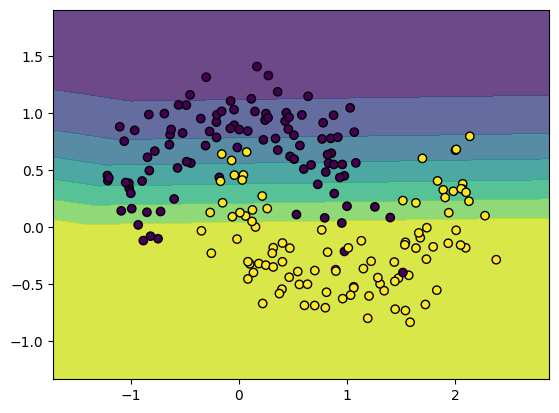

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Générer les données
n_samples = 200
X_data, y_data = make_moons(n_samples=n_samples, noise=0.2, random_state=None)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Créer le modèle
model = Sequential()

# Ajouter la couche cachée avec 2 neurones et la fonction d'activation ReLU
model.add(Dense(2, input_dim=2, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et la fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X_data, y_data)

Epoch 1/100
20/20 [==============================] - 1s 5ms/step - loss: 0.6943 - accuracy: 0.5312 - val_loss: 0.6470 - val_accuracy: 0.8000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6351 - accuracy: 0.6812 - val_loss: 0.5921 - val_accuracy: 0.8250
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5831 - accuracy: 0.7375 - val_loss: 0.5484 - val_accuracy: 0.8250
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5390 - accuracy: 0.7688 - val_loss: 0.5083 - val_accuracy: 0.8250
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5013 - accuracy: 0.7875 - val_loss: 0.4751 - val_accuracy: 0.8250
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.8188 - val_loss: 0.4489 - val_accuracy: 0.8250
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8313 - val_loss: 0.4276 - val_accuracy: 0.8500
Epoch 8/100
2

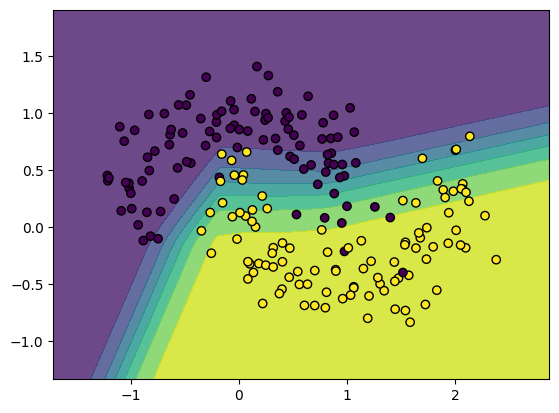

In [12]:
# Créer le modèle
model = Sequential()

# Ajouter la couche cachée avec 2 neurones et la fonction d'activation ReLU
model.add(Dense(50, input_dim=2, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et la fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X_data, y_data)

In [5]:
pip install tensorflow==2.12.0 -break-system-packages


Usage:   
  /usr/bin/python3 -m pip install [options] <requirement specifier> [package-index-options] ...
  /usr/bin/python3 -m pip install [options] -r <requirements file> [package-index-options] ...
  /usr/bin/python3 -m pip install [options] [-e] <vcs project url> ...
  /usr/bin/python3 -m pip install [options] [-e] <local project path> ...
  /usr/bin/python3 -m pip install [options] <archive url/path> ...

no such option: -b
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
print(tf.__version__)

2025-03-02 00:04:34.325523: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-02 00:04:34.364040: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-02 00:04:34.902442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 1.1474 - accuracy: 0.2000 - val_loss: 1.0921 - val_accuracy: 0.2000
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.1186 - accuracy: 0.1875 - val_loss: 1.0680 - val_accuracy: 0.2000
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0918 - accuracy: 0.1750 - val_loss: 1.0456 - val_accuracy: 0.2000
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 1.0674 - accuracy: 0.1813 - val_loss: 1.0234 - val_accuracy: 0.2000
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0430 - accuracy: 0.1813 - val_loss: 1.0035 - val_accuracy: 0.2000
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0211 - accuracy: 0.1875 - val_loss: 0.9844 - val_accuracy: 0.1750
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 1.0001 - accuracy: 0.1875 - val_loss: 0.9658 - val_accuracy: 0.1750
Epoch 8/100
2

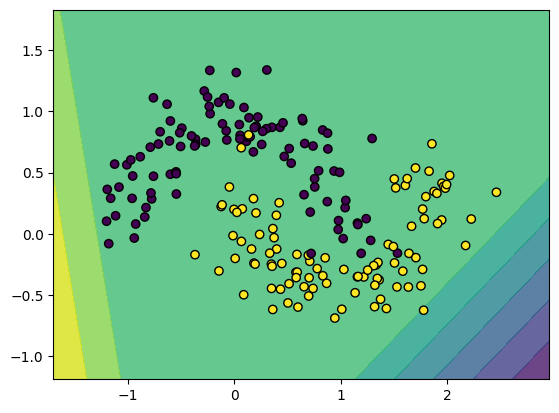

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Générer les données
n_samples = 200
X_data, y_data = make_moons(n_samples=n_samples, noise=0.2, random_state=None)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# Créer le modèle
model = Sequential()

# Ajouter la couche cachée avec 2 neurones et la fonction d'activation ReLU
model.add(Dense(2, input_dim=2, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et la fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X_data, y_data)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.8856 - accuracy: 0.2313 - val_loss: 0.8546 - val_accuracy: 0.1750
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8639 - accuracy: 0.2062 - val_loss: 0.8344 - val_accuracy: 0.2000
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8436 - accuracy: 0.1937 - val_loss: 0.8154 - val_accuracy: 0.2250
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8245 - accuracy: 0.1937 - val_loss: 0.7971 - val_accuracy: 0.3750
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8053 - accuracy: 0.3375 - val_loss: 0.7806 - val_accuracy: 0.4750
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.7882 - accuracy: 0.3688 - val_loss: 0.7638 - val_accuracy: 0.5000
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7710 - accuracy: 0.3938 - val_loss: 0.7470 - val_accuracy: 0.5000
Epoch 8/100
2

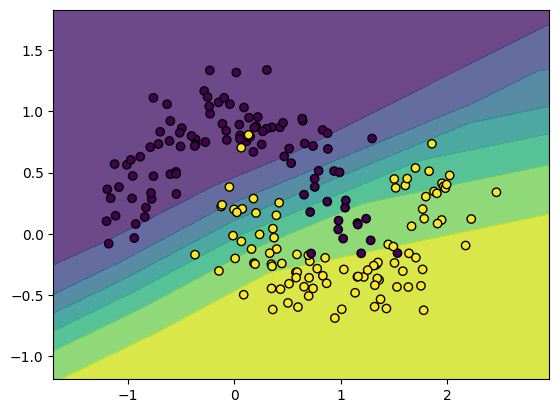

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Créer le modèle
model = Sequential()

# Ajouter la couche cachée avec 2 neurones et la fonction d'activation ReLU
model.add(Dense(5, input_dim=2, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et la fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X_data, y_data)

Epoch 1/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6872 - accuracy: 0.5125 - val_loss: 0.6978 - val_accuracy: 0.4500
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6679 - accuracy: 0.5000 - val_loss: 0.6794 - val_accuracy: 0.4500
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.5063 - val_loss: 0.6614 - val_accuracy: 0.5000
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6350 - accuracy: 0.5500 - val_loss: 0.6455 - val_accuracy: 0.5250
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.5813 - val_loss: 0.6303 - val_accuracy: 0.5750
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6059 - accuracy: 0.6000 - val_loss: 0.6155 - val_accuracy: 0.6000
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.5924 - accuracy: 0.6438 - val_loss: 0.6015 - val_accuracy: 0.6250
Epoch 8/100
2

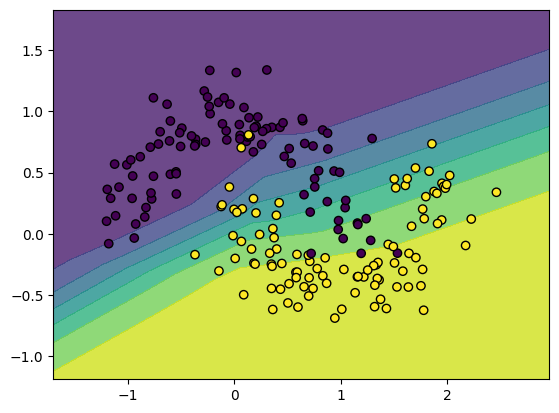

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Créer le modèle
model = Sequential()

# Ajouter la couche cachée avec 2 neurones et la fonction d'activation ReLU
model.add(Dense(10, input_dim=2, activation='relu'))

# Ajouter la couche de sortie avec 1 neurone et la fonction d'activation sigmoïde
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

# Évaluer le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Tracer la frontière de décision
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

plot_decision_boundary(model, X_data, y_data)